<a href="https://colab.research.google.com/github/sdiaz8/sdiaz8/blob/main/Simple%20and%20Multiple%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Regression

In [ ]:
#import numpy, pandas, statsmodel
import numpy as np
import pandas as pd
import seaborn as sns 
import statsmodels.api as sm

In [ ]:
#Import and load Boston datasets
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#Describe Boston Dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
#Define the data as pre-set feature names
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['MEDV'] = boston.target

In [ ]:
#print first 5 rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


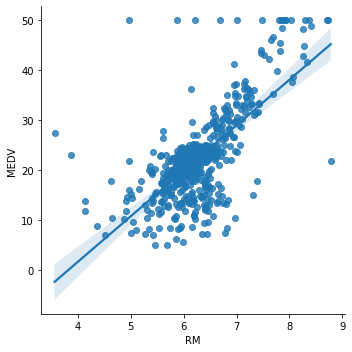

In [ ]:
#use RM as x, MEDV as y, and build model
sns.lmplot('RM', 'MEDV', data=df)

From the model, we can determine that if a bedroom is added to a dwelling the median value of the house rises by ~$10,000

In [ ]:
#print out data statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#Multiple Regression Using statsmodel

In [ ]:
#Define 'RM' and 'LSTAT' as predictors, put 'MEDV' as target
x= df[['RM','LSTAT']]
y= df['MEDV']
#Define and print model
X2 = sm.add_constant(x) 
est = sm.OLS(y, X2).fit()
est.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Sat, 26 Feb 2022   Prob (F-statistic):          7.01e-112
Time:                        19:43:53   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The prediction of of the model is, Median value of owner-occupied homes in $1000's = 5.0948 (average number of rooms per dwelling) - .6424 (% lower status of the population) - 1.3583 (constant)

If an R^2 is .948, that means that 94.8% of the dependent variables are understood through the independent variables

There is positive autocorrelation in the Durbin-Watson value is between 0-2 (.834).

The data is coming from a normal distribution because the Prob(JB) is close to 0 (4.11e-100). 

#Multiple Regression Using scikitlearn

In [ ]:
#Define 'RM' and 'LSTAT' as predictors, put 'MEDV' in different database
x= pd.DataFrame(df[['RM','LSTAT']])
y= pd.DataFrame(df['MEDV'])

In [ ]:
#Define the model
lm = LinearRegression().fit(x,y)

In [ ]:
#Print predictions
x_pred = lm.predict(x)
print('Predicted Values: ', x_pred)

Predicted Values:  [[28.94101368]
 [25.48420566]
 [32.65907477]
 [32.40652   ]
 [31.63040699]
 [28.05452701]
 [21.28707846]
 [17.78559653]
 [ 8.10469338]
 [18.24650673]
 [17.99496223]
 [20.73221309]
 [18.5534842 ]
 [23.64474107]
 [23.10895823]
 [22.9239452 ]
 [24.65257604]
 [19.73611045]
 [18.9297215 ]
 [20.57377596]
 [13.51732408]
 [20.14832175]
 [17.90896697]
 [15.48764606]
 [18.35281036]
 [16.56210901]
 [18.74440281]
 [18.34995811]
 [23.51018847]
 [24.94888935]
 [13.23095259]
 [21.20092715]
 [11.15596625]
 [15.89983805]
 [16.63398622]
 [22.65107562]
 [21.07107521]
 [22.81275431]
 [22.53014238]
 [29.46686594]
 [33.15564849]
 [30.0244275 ]
 [26.33937234]
 [25.50630935]
 [23.42747337]
 [21.03183392]
 [19.03080004]
 [17.28696205]
 [ 6.35742724]
 [16.77652446]
 [20.38222834]
 [23.73891662]
 [28.42223975]
 [23.78518476]
 [19.13293549]
 [32.4841017 ]
 [27.4553513 ]
 [30.83048667]
 [25.54262118]
 [22.91599173]
 [19.44389291]
 [19.76157796]
 [27.21060683]
 [26.99027936]
 [29.66411644]
 [27.6

In [ ]:
#Print the coefficent of determination
print('Coefficient of Determination:', lm.score(x, y))

Coefficient of Determination: 0.6385616062603403


In [ ]:
#Print intercept and coefficients
print('Intercept ', lm.intercept_)
print('Coefficients ', lm.coef_)

Intercept  [-1.35827281]
Coefficients  [[ 5.09478798 -0.64235833]]
